What are the most demanded skills for the top 3 most popular data roles?

In [62]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_theme(style='ticks')

In [63]:
dataset = load_dataset('lukebarousse/data_jobs') # Loading Data
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])#convert to datetime
df_US = df[(df['job_country'] == 'United States')].copy()  #analysing only USA jobs as USA has the most jobs in the posting from below
df_US['job_skills'] = df_US['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #skills column is a strings of list. so converting to a list 
df_USA = df_US.explode('job_skills')  #exploding the skills column to see better each skills

In [64]:
df_USA_grouped = df_USA.groupby(['job_skills', 'job_title_short']).size()
df_USA_grouped = df_USA_grouped.reset_index(name='skill_count')
df_USA_grouped.sort_values('skill_count', ascending= False, inplace= True)
df_USA_grouped

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [65]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name= 'jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [66]:
df_skills_percent = pd.merge(left= df_USA_grouped, right= df_job_title_count, how= 'left', on= 'job_title_short')
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,vue.js,Business Analyst,1,7382
1866,arch,Business Analyst,1,7382
1867,asana,Machine Learning Engineer,1,921
1868,no-sql,Machine Learning Engineer,1,921


In [67]:
df_skills_percent['skill_percent'] = df_skills_percent['skill_count'] * 100 / df_skills_percent['jobs_total']
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


In [69]:
top_titles = list(df_USA_grouped['job_title_short'].unique())
top_titles = sorted(top_titles[:3])
top_titles  #top 3 most popular roles

['Data Analyst', 'Data Engineer', 'Data Scientist']

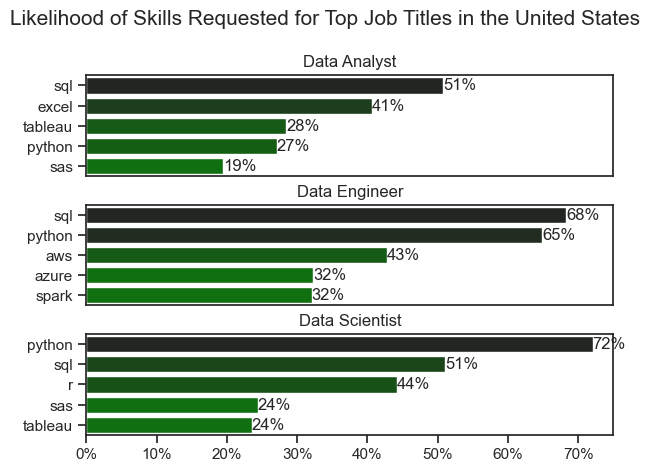

In [70]:
fig, ax = plt.subplots(len(top_titles), 1)
for i, job_title in enumerate(top_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head()
    sns.barplot(df_plot, x= 'skill_percent', y= 'job_skills', ax= ax[i], hue= 'skill_percent', palette= 'dark:green_r', legend= False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
    ax[i].set_xlim(0, 75)
    if i != len(top_titles) - 1:
        ax[i].set_xticks([])

    for index, val in enumerate(df_plot['skill_percent']):
        ax[i].text(val, index, f'{val:.0f}%', va= 'center')
fig.suptitle('Likelihood of Skills Requested for Top Job Titles in the United States', fontsize= 15)
fig.tight_layout(h_pad= 0.5)
#sns.despine()

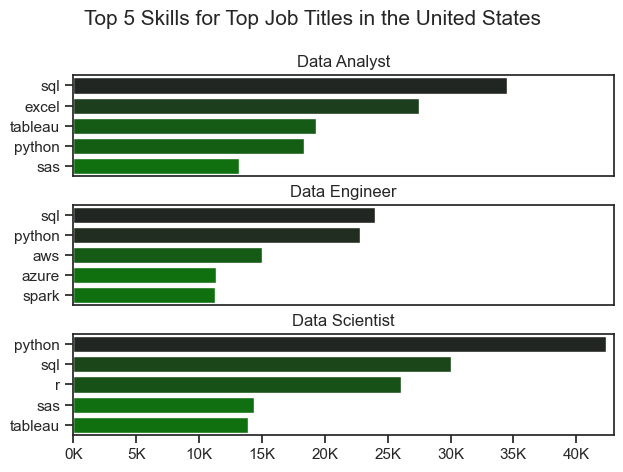

In [78]:
fig, ax = plt.subplots(len(top_titles), 1)
for i, job_title in enumerate(top_titles):
    df_plot = df_USA_grouped[df_USA_grouped['job_title_short'] == job_title].head()
    sns.barplot(df_plot, x= 'skill_count', y= 'job_skills', ax= ax[i], hue= 'skill_count', palette= 'dark:green_r', legend= False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0, 43000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
    if i != len(top_titles) - 1:
        ax[i].set_xticks([])
fig.suptitle('Top 5 Skills for Top Job Titles in the United States', fontsize= 15)
fig.tight_layout(h_pad= 0.5)
#sns.despine()